# Práctica 4

Esta práctica está dedicada a los modelos generativos. 

## Ejercicio obligatorio (5 puntos)

En el notebook Practica4_Autoencoders se muestra cómo construir un autoencoder y un variational autoencoder para el dataset de MNIST. El ejercicio obligatorio para esta práctica consiste en crear un autoencoder y un variational autoencoder para 5 de las clases (a tu elección) del dataset [Quick, Draw!](https://quickdraw.withgoogle.com/data). El dataset Quick, Draw! está disponible [aquí](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false) en forma de ficheros numpy. Si pulsas sobre cualquier de los ficheros verás que se proporciona una URL pública para descargarlo. Una vez que los descargues en el entorno para cargarlos debes usar los siguientes comandos (se muestra un ejemplo para los datos de la clase eifel).  

In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Eiffel%20Tower.npy -O eiffel.npy
eiffel = np.load('eiffel.npy')

--2023-04-25 16:10:17--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Eiffel%20Tower.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105684064 (101M) [application/octet-stream]
Saving to: ‘eiffel.npy’

eiffel.npy          100%[===================>] 100.79M   238MB/s    in 0.4s    

2023-04-25 16:10:17 (238 MB/s) - ‘eiffel.npy’ saved [105684064/105684064]



Podemos ver la forma que tienen estos datos que aunque son imágenes de tamaño $28\times 28$ están aplanados. 

In [ ]:
eiffel.shape

(134801, 784)

Para cambiar su shape puedes hacer lo siguiente:

In [ ]:
eiffel2 = np.reshape(eiffel,(134801, 28,28))

In [ ]:
eiffel2.shape

(134801, 28, 28)

Podemos ahora mostrar una de esos garabatos de la torre Eiffel. 

In [ ]:
from PIL import Image
Image.fromarray(eiffel2[0])

## Ejercicios opcionales

Para cada uno de los ejercicios opcionales crea un nuevo notebook dedicado a ello. 

- *GAN* (1 punto). Siguiendo el [tutorial de Keras sobre GANs](https://keras.io/examples/generative/dcgan_overriding_train_step/) reemplaza el variational autoencoder desarrollado en el ejercicio obligatorio con una GAN. 
- *Wasserstein GAN* (1 punto). Una manera de mejorar los resultados producidos por las GANs consiste en utilizar una variante llamada [Wasserstein GAN](https://arxiv.org/abs/1701.07875). Siguiendo el [tutorial de Keras sobre Wasserstein GANs](https://keras.io/examples/generative/wgan_gp/) reemplaza la GAN desarrollada en el ejercicio anterior con una Wasserstein GAN. 
- *Coloreado de imágenes* (1.5 puntos). Las GANs pueden usarse para tareas como la superresolución o el coloreado de imágenes. En el tutorioal de [Walk with FastAI](https://walkwithfastai.com/Super_Resolution) se explica cómo utilizar una GAN para obtener un modelo de super resolución. El ejercicio consiste en adaptar dicho modelo para el coloreado de imágenes.  
- *CycleGAN* (1.5 puntos). La librería [UPIT](https://github.com/tmabraham/UPIT) implementa un método de traducción entre imágenes sin emparejar llamado [CycleGAN](https://junyanz.github.io/CycleGAN/). Usando dicha librería crea un modelo para transformar manzanas a naranjas. Para ello puedes utilizar este notebook disponible en [Kaggle](https://www.kaggle.com/tanlikesmath/upit-a-package-for-unpaired-img2img-translation).

Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.


# EJERCICIO OBLIGATORIO

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy -O alarm.npy
alarm = np.load('alarm.npy')

--2023-04-25 16:10:26--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96744896 (92M) [application/octet-stream]
Saving to: ‘alarm.npy’

alarm.npy           100%[===================>]  92.26M   108MB/s    in 0.9s    

2023-04-25 16:10:27 (108 MB/s) - ‘alarm.npy’ saved [96744896/96744896]



In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/beach.npy -O beach.npy
beach = np.load('beach.npy')

--2023-04-25 16:10:28--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/beach.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97951472 (93M) [application/octet-stream]
Saving to: ‘beach.npy’

beach.npy           100%[===================>]  93.41M   180MB/s    in 0.5s    

2023-04-25 16:10:28 (180 MB/s) - ‘beach.npy’ saved [97951472/97951472]



In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/birthday%20cake.npy -O bdaycake.npy
bdaycake = np.load('bdaycake.npy')

--2023-04-25 16:10:30--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/birthday%20cake.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113665968 (108M) [application/octet-stream]
Saving to: ‘bdaycake.npy’

bdaycake.npy        100%[===================>] 108.40M  39.5MB/s    in 2.7s    

2023-04-25 16:10:33 (39.5 MB/s) - ‘bdaycake.npy’ saved [113665968/113665968]



In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/diamond.npy -O diamond.npy
diamond = np.load('diamond.npy')

--2023-04-25 16:10:33--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/diamond.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103164288 (98M) [application/octet-stream]
Saving to: ‘diamond.npy’

diamond.npy         100%[===================>]  98.38M  63.9MB/s    in 1.5s    

2023-04-25 16:10:35 (63.9 MB/s) - ‘diamond.npy’ saved [103164288/103164288]



In [ ]:
import numpy as np
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy -O eye.npy
eye = np.load('eye.npy')

--2023-04-25 16:10:35--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98696272 (94M) [application/octet-stream]
Saving to: ‘eye.npy’

eye.npy             100%[===================>]  94.12M  96.8MB/s    in 1.0s    

2023-04-25 16:10:36 (96.8 MB/s) - ‘eye.npy’ saved [98696272/98696272]



In [ ]:
alarm = np.reshape(alarm, (alarm.shape[0],28,28))

beach = np.reshape(beach, (beach.shape[0],28,28))

bdaycake = np.reshape(bdaycake, (bdaycake.shape[0],28,28))

diamond = np.reshape(diamond, (diamond.shape[0],28,28))

eye = np.reshape(eye, (eye.shape[0],28,28))

In [ ]:
print('Las dimensiones de la alarma son : ', alarm.shape)

print('Las dimensiones de la playa son : ', beach.shape)

print('Las dimensiones de la tarta de cumpleaños son : ', bdaycake.shape)

print('Las dimensiones del diamante son : ', diamond.shape)

print('Las dimensiones del ojo  son : ', eye.shape)

Las dimensiones de la alarma son :  (123399, 28, 28)
Las dimensiones de la playa son :  (124938, 28, 28)
Las dimensiones de la tarta de cumpleaños son :  (144982, 28, 28)
Las dimensiones del diamante son :  (131587, 28, 28)
Las dimensiones del ojo  son :  (125888, 28, 28)


In [ ]:
from PIL import Image
Image.fromarray(alarm[0])

In [ ]:
from PIL import Image
Image.fromarray(beach[0])

In [ ]:
from PIL import Image
Image.fromarray(bdaycake[0])

In [ ]:
from PIL import Image
Image.fromarray(diamond[0])

In [ ]:
from PIL import Image
Image.fromarray(eye[0])

In [ ]:
dim_alarm = int(np.round(alarm.shape[0] * 0.8))

dim_beach = int(np.round(beach.shape[0] * 0.8))

dim_bdaycake = int(np.round(bdaycake.shape[0] * 0.8))

dim_diamond = int(np.round(diamond.shape[0] * 0.8))

dim_eye = int(np.round(eye.shape[0] * 0.8))

In [ ]:
x_train = alarm[:dim_alarm,:,:]

x_train = np.concatenate((x_train, beach[:dim_beach,:,:]))

x_train = np.concatenate((x_train, bdaycake[:dim_bdaycake,:,:]))

x_train = np.concatenate((x_train, diamond[:dim_diamond,:,:]))

x_train = np.concatenate((x_train, eye[:dim_eye,:,:]))


In [ ]:
x_test = alarm[dim_alarm:,:,:]

x_test= np.concatenate((x_test, beach[dim_beach:,:,:]))

x_test = np.concatenate((x_test, bdaycake[dim_bdaycake:,:,:]))

x_test = np.concatenate((x_test, diamond[dim_diamond:,:,:]))

x_test = np.concatenate((x_test, eye[dim_eye:,:,:]))

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Autoencoder

Pasamos ahora a definir la arquitectura de nuestro autoencoder. Para ello lo primero que debemos hacer es definir la forma que tendrán los datos de entrada de nuestro autoencoder.

In [ ]:
input_img = layers.Input(shape=(28,28,1))

Recordar que un autoencoder consta de un encoder y un decoder. Definimos a continuación nuestro encoder que va a constar de una pila de capas de convolución y de max pooling. Al aplicar el proceso de encoding llegamos a una reprentación final de tamaño (4,4,8) es decir 128 dimensiones, es decir hemos reducido casi a una sexta parte la codificación de nuestras imágenes.

In [ ]:
# Capa convolucional con 32 filtros de tamaño 3x3 seguida de una función de activación relu y aplicando padding
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# Capa de max pooling con filtro de tamaño 2x2 y aplicando padding
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

El decoder se define mediante una pila de capas de convolución y de upsampling (capas con la función inversa que las de pooling). Notar que la entrada de la primera capa del decoder es la salida del encoder. Notar que la arquitectura es simétrica a la del encoder. 

In [ ]:
# Capa convolucional con 32 filtros de tamaño 3x3 seguida de una función de activación relu y aplicando padding
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
 # Capa de upsampling con filtro de tamaño 2x2 y aplicando padding
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Por último definimos nuestro modelo de autoencoder y lo compilamos. En Keras es necesario compilar un modelo para fijar el optimizador que se utilizará para entrenarlo (en este caso [ADAM](https://arxiv.org/abs/1412.6980) que es una variante del descenso de gradiente) y la función de pérdida (en este caso la [binary crossentropy](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class)).

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Con la siguiente instrucción podemos mostrar la arquitectura de una red de Keras. 

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

También puede ser útil visualizar dicha red.

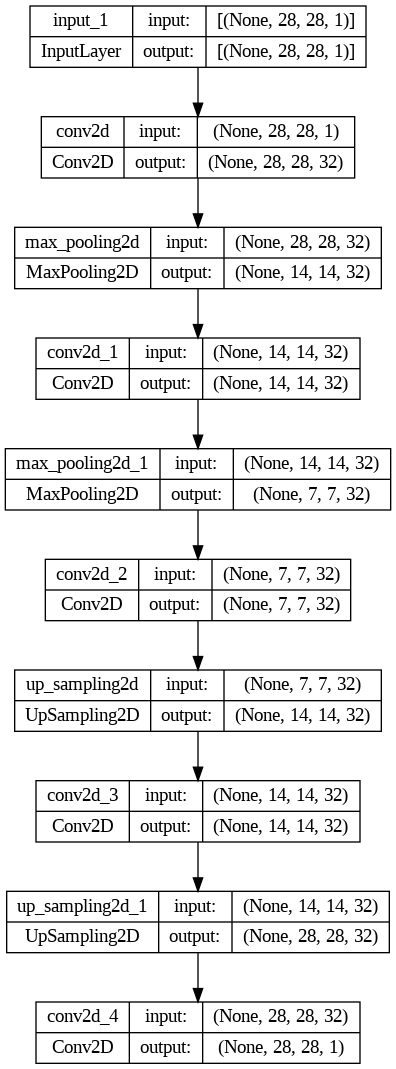

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='autoencoder_plot.png', show_shapes=True, show_layer_names=True)

Vamos ahora a entrenar nuestro modelo para ello usamos el método `fit` que está disponible para cualquier modelo de Keras.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/20
4068/4068 [==============================] - 44s 7ms/step - loss: -1667012184946769920.0000 - val_loss: -8427535075310043136.0000
Epoch 2/20
4068/4068 [==============================] - 26s 6ms/step - loss: -48763477031307444224.0000 - val_loss: -121699286190712160256.0000
Epoch 3/20
4068/4068 [==============================] - 26s 6ms/step - loss: -306941882625389756416.0000 - val_loss: -575999942582176055296.0000
Epoch 4/20
4068/4068 [==============================] - 26s 6ms/step - loss: -1091335835233718108160.0000 - val_loss: -1770499558558209671168.0000
Epoch 5/20
4068/4068 [==============================] - 26s 6ms/step - loss: -2896701769525820915712.0000 - val_loss: -4299494240458251436032.0000
Epoch 6/20
4068/4068 [==============================] - 26s 6ms/step - loss: -6429200905295531868160.0000 - val_loss: -8984970612880198074368.0000
Epoch 7/20
4068/4068 [==============================] - 26s 6ms/step - loss: -12642033121893489311744.0000 - val_loss: -169117777

Vamos a mostrar la reconstrucción de algunos de los dígitos. Al ejecutar la siguiente celda, la primera fila muestra los dígitos originales y la segunda los reconstruidos. 

In [1]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: ignored

## Variational autoencoder

Como hemos visto en teoría un autoencoder toma una imagen, la mapea a un espacio vectorial subyacente por medio de un encoder, y seguidamente la decodifica a una salida con el tamaño de la imagen original. En la práctica, los autoencoders no son especialmente útiles, y han sido reemplazados por los variational autoencoders (o VAEs).

Un VAE en lugar de comprimir la imagen en un vector fijo en el espacio subyacente, la convierte a los parámetros de una distribución estadística (representada mediante una media y una varianza). Esencialmente, esto significa que asumimos que la imagen original ha sido generada mediante un proceso estadístico, y que la aleatoriedad de dicho proceso debe ser tomada en cuenta a la hora de proceso de codificación y decodificación. 

Un VAE usa los parámetros de media y varianza para tomar una muestra aleatoria de un elemento de la distribución, y decodifica dicho elemento de vuelta. Esto hace que mejore la robusted y fuerza a que el espacio subyacente obtenga representaciones significativas (notar que cualquier muestra de la distribución tiene que ser decodificada a una salida valida).

Desde el punto de vista técnico, un VAE funciona del siguiente modo:
1. Un encoder convierte la entrada en dos parámetros de un espacio subyacente de representaciones que denotaremos por `z_mean` y `z_log_var`.
2. Tomamos una muestra aleatoria `z` de la distribución normal que asumimos que genera la imagen de entrada mediante la fórmula `z = z_mean + exp(z_log_var)*epsilon` donde `epsilon` es un valor aleatorio pequeño.
3. La muestra `z` se decodifica.  Al tomar `epsilon` de manera aleatoria y con valor pequeño, el proceso asegura que cada punto que está cerca de la localización subyacente de la imagen puede ser decodificado a algo similar a la imagen de entrada. 

Para entrenar un VAE se usan dos funciones de pérdida: una que es la función de pérdida de reconstrucción que fuerza a que las muestras decodificadas se ajusten a las entradas iniciales, y una función de pérdida de regularización que ayuda a una formación correcta de los espacios subyacentes y a que no se produzca sobreajuste. 

### Capa de Sampling

Lo primero que vamos a definir es una nueva capa encargada de tomar una muestra aleatoria a partir de los valores de `z_mean` y `z_log_var`. Para ello debemos definir una nueva clase que hereda de la clase `Layer` de Keras y definir la función `call`.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

### Encoder

El encoder va a ser similar al encoder que vimos para el autoencoder, la principal diferencia es que va a producir dos vectores de salida, `z_mean` y `z_log_var`.

In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

### Decoder

Ahora podemos definir el decoder, utilizando una arquitectura simétrica al encoder. 

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

Por último vamos a definir un nuevo modelo que une nuestro encoder y decoder definidos anteriormente, y definimos nuestra función de pérdida que va a tener en cuenta la función de pérdida de reconstrucción y la función de pérdida de regularización. Para ello debemos definir una nueva clase que herede de `Model`.

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### Entrenamiento

Finalmente, instanciamos el modelo y lo compilamos. Notar que no es necesario definir una función de pérdida de manera explícita ya que la hemos definido anteriormente. Esto supone que a la hora de entrenar el modelo no hará falta proporcionar la salida espera del modelo ya que es la misma que la entrada y de ello se encarga la capa definida anteriormente. 

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [ ]:
x_train.shape

(520635, 28, 28, 1)

Podemos ahora entrenar el modelo para lo que vamos a juntar los conjuntos de entrenamiento y test de MNIST. 

In [ ]:
random_digits = np.concatenate([x_train, x_test], axis=0)
random_digits = np.expand_dims(random_digits, -1).astype("float32") / 255

vae.fit(random_digits, epochs=20, batch_size=128)

In [ ]:
random_digits.shape

(650794, 28, 28, 1)

Una vez que el modelo se ha entrenado, podemos usar el decoder para convertir puntos aleatorios del espacio subyacente en imágenes. 

In [ ]:
import matplotlib.pyplot as plt

def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

La cuadrícula anterior muestra una distribución continua de los dígitos de las distintas clases, y se puede ver cómo un dígito se transforma en otro al seguir un camino a través del espacio subyacente. Notar que hay direcciones subyacentes que tienen significado (como cuatri-ficar o uni-ficar).

Por último podemos ver los clústeres del espacio subyacente asociados a cada clase. 

In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.set_cmap('viridis')
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)